In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from datetime import datetime

In [110]:
df = pd.read_csv('Bases/CEAS_08.csv')
df

,sender,receiver,date,subject,body,label,urls
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1
...,...,...,...,...,...,...,...
39149,CNN Alerts <charlene-detecton@btcmarketing.com>,email1007@gvc.ceas-challenge.cc,"Fri, 08 Aug 2008 10:34:50 -0400",CNN Alerts: My Custom Alert,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,1,0
39150,CNN Alerts <idgetily1971@careplusnj.org>,email104@gvc.ceas-challenge.cc,"Fri, 08 Aug 2008 10:35:11 -0400",CNN Alerts: My Custom Alert,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,1,0
39151,Abhijit Vyas <xpojhbz@gmail.com>,fxgmqwjn@triptracker.net,"Fri, 08 Aug 2008 22:00:43 +0800",Slideshow viewer,Hello there ! \nGreat work on the slide show v...,0,0
39152,Joseph Brennan <vupzesm@columbia.edu>,zqoqi@spamassassin.apache.org,"Fri, 08 Aug 2008 09:00:46 -0500",Note on 2-digit years,"\nMail from sender , coming from intuit.com\ns...",0,0


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39154 entries, 0 to 39153
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sender    39154 non-null  object
 1   receiver  38692 non-null  object
 2   date      39154 non-null  object
 3   subject   39126 non-null  object
 4   body      39154 non-null  object
 5   label     39154 non-null  int64 
 6   urls      39154 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.1+ MB


In [112]:
#Cantidad de phishing y legitimos

cantidad = df['label'].value_counts()


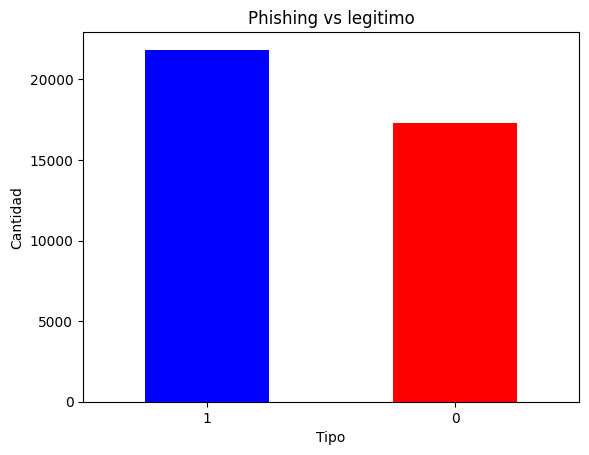

In [113]:
 #Grafica entre phishing vs legitimo

cantidad.plot(kind='bar', color=['blue', 'red'])
plt.title('Phishing vs legitimo')
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.show()


In [114]:
url = df['urls'].value_counts()
url

urls
1    26232
0    12922
Name: count, dtype: int64

In [115]:
#LInks que aparecen en los correos

url_correos = df.groupby('label')['urls'].value_counts().unstack()
url_correos

urls,0,1
label,,
0,5969,11343
1,6953,14889


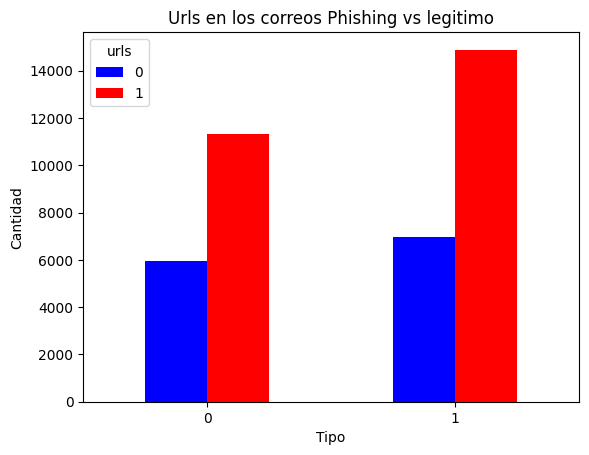

In [116]:
#Grafico para observar el comportamiento de urls en los correos

url_correos.plot(kind='bar', color=['blue', 'red'])
plt.title('Urls en los correos Phishing vs legitimo')
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.show()

In [117]:
#Detectar dominios de correos 
#extract() permite extraer una parte de la cadena

df['dominios'] = df['sender'].str.extract(r'<[^@<]*@([^>]+)>')
df['dominios']

0                  iworld.de
1                  icable.ph
2        universalnet.psi.br
3                  pobox.com
4        loanofficertool.com
                ...         
39149       btcmarketing.com
39150         careplusnj.org
39151              gmail.com
39152           columbia.edu
39153             cheimes.de
Name: dominios, Length: 39154, dtype: object

In [118]:
#Dominio de correos phishing

df.loc[df['label'].isin([0, 1])].groupby('label').agg({'urls':'count','dominios': 'count',})


,urls,dominios
label,,
0,17312,15306
1,21842,20377


In [119]:
df.loc[df['urls'].isin([0, 1])].groupby('urls').agg({'label':'count','dominios': 'count',})


,label,dominios
urls,,
0,12922,12414
1,26232,23269


In [141]:
df['date'] = pd.to_datetime(df['date'], format='%a, %d %b %Y %H:%M:%S %z', errors='coerce')
df

,sender,receiver,date,subject,body,label,urls,dominios
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,2008-08-05 16:31:02-07:00,Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1,iworld.de
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,NaT,Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1,icable.ph
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,NaT,CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1,universalnet.psi.br
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,NaT,Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1,pobox.com
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,NaT,SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1,loanofficertool.com
...,...,...,...,...,...,...,...,...
39149,CNN Alerts <charlene-detecton@btcmarketing.com>,email1007@gvc.ceas-challenge.cc,NaT,CNN Alerts: My Custom Alert,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,1,0,btcmarketing.com
39150,CNN Alerts <idgetily1971@careplusnj.org>,email104@gvc.ceas-challenge.cc,NaT,CNN Alerts: My Custom Alert,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,1,0,careplusnj.org
39151,Abhijit Vyas <xpojhbz@gmail.com>,fxgmqwjn@triptracker.net,NaT,Slideshow viewer,Hello there ! \nGreat work on the slide show v...,0,0,gmail.com
39152,Joseph Brennan <vupzesm@columbia.edu>,zqoqi@spamassassin.apache.org,NaT,Note on 2-digit years,"\nMail from sender , coming from intuit.com\ns...",0,0,columbia.edu
